# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** I KADEK WIDI ADNYANA
- **Email:** ikdwidiadnyana@gmail.com
- **ID Dicoding:** widiadnyana20

## Menentukan Pertanyaan Bisnis

- Pada musim apa penyewaan sepeda paling sedikit?
- Berapa banyak penyewa casual dibandingkan registered?
- Bagaimana grafik penggunaan sepeda pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#load tabel day_data
day_data = pd.read_csv("/content/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#load tabel hour_data
hour_data = pd.read_csv("/content/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing Data pada day_data

In [4]:
#mengecek apakah ada missing values pada day_data
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan pengecekan di atas, dapat disimpulkan tidak ada missing values pada day_data, sehingga dataset dapat dikatakan aman.

In [5]:
#mengecek apakah ada duplicate data pada day_data
print("Data Duplikat : ", day_data.duplicated().sum())

Data Duplikat :  0


Berdasarkan pengecekan di atas, tidak terdapat data duplikat pada tabel day_data, sehingga data dapat dikatakan unik

In [6]:
#mengecek tipe data pada data day_data
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
#mengecek parameter statistik dari day_data
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assessing Data pada hour_data

In [8]:
#mengecek apakah ada missing values pada hour_data
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan pengecekan di atas, dapat disimpulkan tidak ada missing values pada hour_data, sehingga dataset dapat dikatakan aman.

In [9]:
#mengecek apakah ada duplicate data pada hour_data
print("Data Duplikat : ", hour_data.duplicated().sum())

Data Duplikat :  0


Berdasarkan pengecekan di atas tidak terdapat data duplikat pada tabel hour_data, sehingga data dapat dikatakan data unik

In [10]:
#mengecek tipe data pada hour_data
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
#mengecek parameter statistik dari hour_data
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
- mengubah tipe data dteday yang tadinya 'object'  menjadi 'datetime'
- mengubah nama kolom agar mudah dibaca
- mengkonversi isi kolom agar mudah dipahami

In [12]:
#mengubah tipe data int menjadi category
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    day_data[column] =  day_data[column].astype("category")
    hour_data[column] =  hour_data[column].astype("category")

In [13]:
#mengubah tipe data dteday yang tadinya 'object' menjadi 'datetime'
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

In [14]:
#mengubah nama kolom pada data day_data dan hour_data agar mudah dibaca
day_data.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

hour_data.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)


In [15]:
#mengkonversi isi kolom agar mudah dipaham

# konversi year menjadi: 0=2011, 1=2012
day_data.year.replace((0,1), ('2011','2012'), inplace=True)
hour_data.year.replace((0,1), ('2011','2012'), inplace=True)

# konversi month menjadi: 1=Jan, 2=Feb, 3=Mar, 4=Apr, 5=May, 6=Jun, 7=Jul, 8=Aug, 9=Sep, 10=Oct, 11=Nov, 12=Dec
day_data.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_data.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi one_of_week menjadi: 0=Minggu, 1=Senin, 2=Selasa, 3=Rabu, 4=Kamis, 5=Jumat, 6=Sabtu
day_data.one_of_week.replace((0,1,2,3,4,5,6), ('Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu'), inplace=True)
hour_data.one_of_week.replace((0,1,2,3,4,5,6), ('Minggu','Senin','Selasa','Rabu','Kamis','Jumat','Sabtu'), inplace=True)

# konversi season menjadi: 1=Semi, 2=Panas, 3=Gugur, 4=Dingin
day_data.season.replace((1,2,3,4), ('Semi','Panas','Gugur','Dingin'), inplace=True)
hour_data.season.replace((1,2,3,4), ('Semi','Panas','Gugur','Dingin'), inplace=True)

# konversi weather_situation menjadi: 1=Cerah, 2=Berkabut, 3=Salju_ringan 4=Salju_lebat
day_data.weather_situation.replace((1,2,3,4), ('Cerah','Berkabut','Salju_ringan','Salju_lebat'), inplace=True)
hour_data.weather_situation.replace((1,2,3,4), ('Cerah','Berkabut','Salju_ringan','Salju_lebat'), inplace=True)

## Exploratory Data Analysis (EDA)

### Explore data hour_data

In [16]:
# menampilkan penyewaan sepeda berdasarkan jam
hour_data.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


berdasarkan EDA yang dilakukan pada data hour_data dilihat bahwa penyewaan sepeda paling banyak pada jam 17.00 dengan jumlah 336860 dan paling sedikit di jam 04.00 dengan jumlah 4428

### Explore data day_data

In [17]:
# menampilkan penyewaan sepeda berdasarkan bulan
day_data.groupby(by='month').agg({
    'count_cr': ['max', 'min', 'mean', 'sum']
})

count_cr                           
           max   min         mean     sum
month                                    
Jan       4521   431  2176.338710  134933
Feb       5062  1005  2655.298246  151352
Mar       8362   605  3692.258065  228920
Apr       7460   795  4484.900000  269094
May       8294  2633  5349.774194  331686
Jun       8120  3767  5772.366667  346342
Jul       8173  3285  5563.677419  344948
Aug       7865  1115  5664.419355  351194
Sep       8714  1842  5766.516667  345991
Oct       8156    22  5199.225806  322352
Nov       6852  1495  4247.183333  254831
Dec       6606   441  3403.806452  211036

berdasarkan EDA yang dilakukan pada data day_data dapat dilihat penyewaan sepeda terbanyak yaitu pada bulan juli dan penyewaan sepeda paling sedikit pada bulan januari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa penyewaan sepeda paling sedikit?

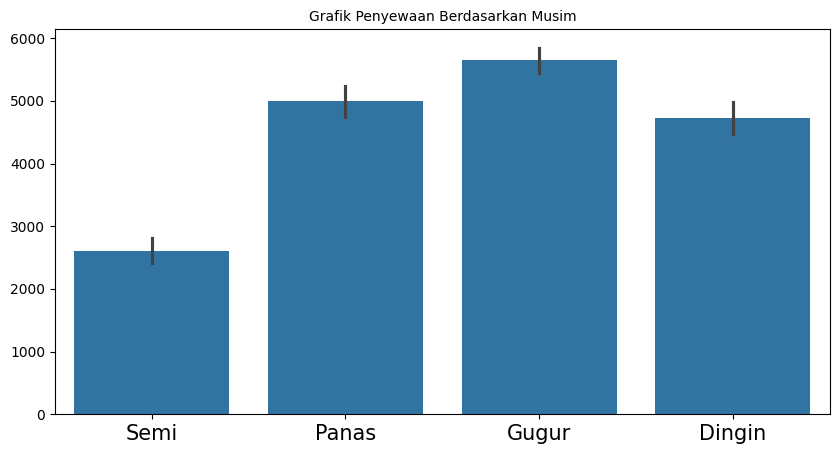

In [18]:
# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(10, 5))

# membuat barplot menggunakan data=day_data
sns.barplot(
        y="count_cr",
        x="season",
        data=day_data.sort_values(by="season", ascending=False),
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Penyewaan Berdasarkan Musim", loc="center", fontsize=10)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

# menampilkan plot
plt.show()

Berdasarkan tampilan analisis di atas, penyewaan sepeda paling sedikit terdapat pada musim semi, kemudian disusul pada musim dingin, musim panas dan penyewaan sepeda paling banyak pada musim gugur

### Pertanyaan 2: Berapa banyak penyewa casual dibandingkan registered?

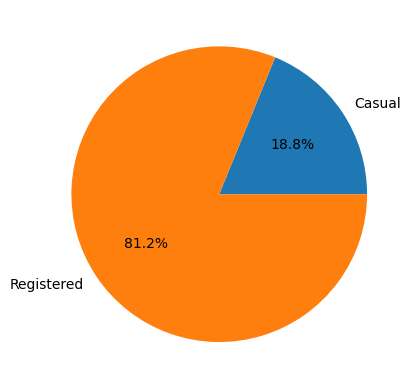

In [19]:
# Menghitung semua elemen dalam kolom casual
casual_count = sum(day_data['casual'])

# Menghitung semua elemen dalam kolom registered
registered_count = sum(day_data['registered'])

# Membuat data untuk pie plot
data = [casual_count, registered_count]
label = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=label, autopct='%1.1f%%')

# Menampilkan pie plot
plt.show()

berdasarkan tampilan analisis di atas terlihat bahwa penyewa casual sebanyak 18.8% hal ini berbanding jauh dengan registered sebanyak 81.2%

### Pertanyaan 3: Bagaimana grafik penggunaan sepeda pada tahun 2011 dan 2012?

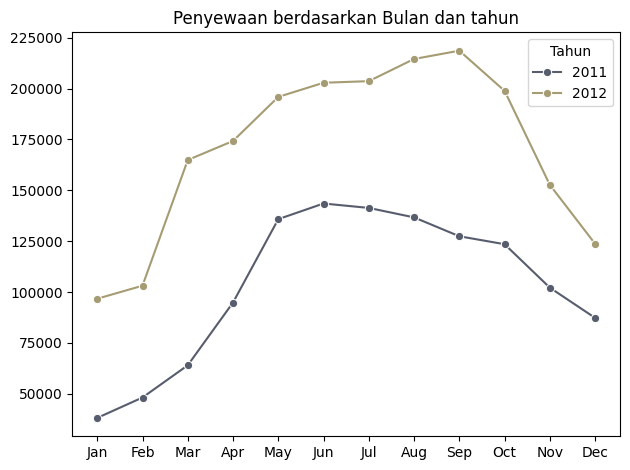

In [20]:
day_data['month'] = pd.Categorical(day_data['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_data.groupby(by=["month","year"]).agg({
    "count_cr": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count_cr",
    hue="year",
    palette="cividis",
    marker="o")

plt.title("Penyewaan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan analisis di atas, terlihat penyewaan sepeda pada tahun 2012 lebih besar dibandingkan pada tahun 2011. hal ini juga terlihat pada penyewaan sepeda tiap bulannya, dimana penyewaan sepeda di setiap bulan pada tahun 2012 lebih banyak dibandingkan di setiap bulan 2011.

## Conclusion

- Conclution pertanyaan 1. Dapat terlihat jelas, penyewaan sepeda paling sedikit terdapat pada musim semi

- Conclution pertanyaan 2. Banyak penyewa casual yaitu 18.8% hal ini berbanding jauh dengan registered yaitu sebanyak 81.2%

- Conclution pertanyaan 3. pada kedua tahun yakni 2011 dan 2012, terjadi perbedaan puncak dan dasar bulan pada kedua tahun tersebut. Puncak dari tahun 2011 berada pada bulan Juni dan dasarnya berada pada bulan Januari. Sedangkan Puncak dari tahun 2012 terdapat pada bulan September dan dasarnya sama yakni bulan Januari. Dan dari kedua visualisasi tersebut dapat kita amati bahwa jumlah total sepeda yang disewakan pada tahun 2012, seluruhnya lebih tinggi daripada pada tahun 2011.